<a href="https://colab.research.google.com/github/onyeogulu/Tensorflow-and-Pytorch-Project/blob/main/ImageAugumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 
import torch
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933823922_911ac40b0d.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6198569425_e953b9e6cc_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5437996076_cf7e2ac32e_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2883115621_4837267ea1_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/6016195304_75306bb79a.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg')]

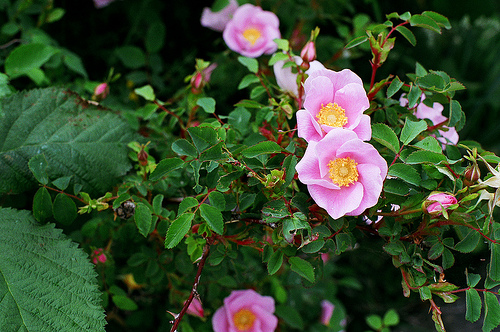

In [9]:
PIL.Image.open(str(roses[1]))

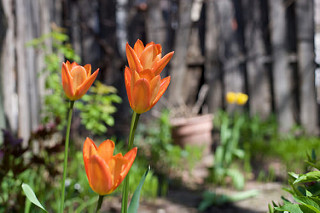

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/6016195304_75306bb79a.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [15]:
cv2.resize(img,(225,225)).shape

(225, 225, 3)

In [16]:
flowers_images_dict.items()

dict_items([('roses', [PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'), PosixPath('datasets/flower_photos/roses/6016195304_75306bb79a.jpg'), PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'), PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'), PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg'), PosixPath('datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg'), PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'), PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'), PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'), PosixPath('datasets/flower_photos/roses/1469726748_f359f4a8c5.jpg'), PosixPath('datasets/flower_photos/roses/159079265_d77a9ac920_n.jpg'), PosixPath('datasets/flower_photos/roses/2332478138_28f1d586e4_n.jpg'), PosixPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [22]:
num_classes = 5
def gpu():
  with tf.device('/device:GPU:0'):
    model = Sequential([
    layers.Conv2D( 16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
    model.fit(X_train_scaled, y_train, epochs=30) 
    model.evaluate(X_test_scaled,y_test)

    predictions = model.predict(X_test_scaled)
    print(predictions)
    score = tf.nn.softmax(predictions[0])
    print(np.argmax(score))

gpu()

Epoch 1/30
86/86 [==============================] - 14s 23ms/step - loss: 1.5105 - accuracy: 0.3895
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0685 - accuracy: 0.5723
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8908 - accuracy: 0.6443
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.7072 - accuracy: 0.7293
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.4990 - accuracy: 0.8187
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.3064 - accuracy: 0.8983
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.1795 - accuracy: 0.9451
Epoch 8/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1294 - accuracy: 0.9571
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0913 - accuracy: 0.9738
Epoch 10/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0734 - accuracy: 0.9811
Epoch 11

In [23]:
data_augmentation = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),])

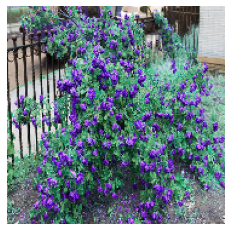

In [24]:
plt.axis('off')
plt.imshow(X[0])

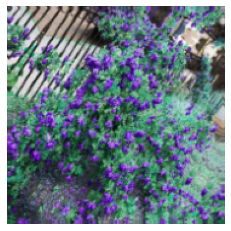

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [26]:
num_classes = 5
def gpu():
  with tf.device('/device:GPU:0'):
    model = Sequential([data_augmentation,
    layers.Conv2D( 16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
    model.fit(X_train_scaled, y_train, epochs=50) 
    print(model.evaluate(X_test_scaled,y_test))

    predictions = model.predict(X_test_scaled)
    print(predictions)
    score = tf.nn.softmax(predictions[0])
    print(np.argmax(score))

gpu()

Epoch 1/50
86/86 [==============================] - 3s 26ms/step - loss: 1.3403 - accuracy: 0.4186
Epoch 2/50
86/86 [==============================] - 2s 26ms/step - loss: 1.0762 - accuracy: 0.5578
Epoch 3/50
86/86 [==============================] - 2s 25ms/step - loss: 0.9703 - accuracy: 0.6108
Epoch 4/50
86/86 [==============================] - 2s 25ms/step - loss: 0.8894 - accuracy: 0.6439
Epoch 5/50
86/86 [==============================] - 2s 26ms/step - loss: 0.8228 - accuracy: 0.6748
Epoch 6/50
86/86 [==============================] - 2s 26ms/step - loss: 0.7771 - accuracy: 0.6951
Epoch 7/50
86/86 [==============================] - 2s 25ms/step - loss: 0.7336 - accuracy: 0.7129
Epoch 8/50
86/86 [==============================] - 2s 25ms/step - loss: 0.6658 - accuracy: 0.7420
Epoch 9/50
86/86 [==============================] - 2s 25ms/step - loss: 0.6612 - accuracy: 0.7395
Epoch 10/50
86/86 [==============================] - 2s 25ms/step - loss: 0.6158 - accuracy: 0.7674
Epoch 11/